7111029041 蔡子靖

## CNN

### 讀取MNIST資料

In [31]:
from keras.utils import np_utils
import numpy as np
from keras.datasets import mnist

np.random.seed(10)

#get MNIST
(x_train , y_train),(x_test,y_test)=mnist.load_data()

#translate data type
x_train4=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

### 資料前處理

In [32]:
#standardize
x_train4_nor = x_train4 /255
x_test_nor=x_test4 / 255

#Onehot encoding
y_train_one=np_utils.to_categorical(y_train)
y_test_one=np_utils.to_categorical(y_test)

### 建立卷積及池化層

In [33]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu',
                 name='conv2d_1'
                ))
model.add(MaxPooling2D(pool_size=(2,2),name='max_pooling2d_1'))
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu',
                 name='conv2d_2'
                 ))
model.add(MaxPooling2D(pool_size=(2,2), name='max_pooling2d_2'))
model.add(Dropout(0.25,name='dropout_1'))
model.add(Flatten(name='flatten_1'))
model.add(Dense(128,activation='relu',name='dense_1'))
model.add(Dropout(0.25,name='dropout_2'))
model.add(Dense(10,activation='softmax',name='dense_2'))

In [34]:
model.summary()
print("")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 36)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1764)             

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

### 進行訓練

In [36]:
train_history=model.fit(x=x_train4_nor,y=y_train_one,validation_split=0.1,epochs=20,batch_size=300,verbose=2)

Epoch 1/20
180/180 - 3s - loss: 0.4063 - accuracy: 0.8765 - val_loss: 0.0764 - val_accuracy: 0.9780 - 3s/epoch - 16ms/step
Epoch 2/20
180/180 - 1s - loss: 0.1015 - accuracy: 0.9695 - val_loss: 0.0532 - val_accuracy: 0.9847 - 1s/epoch - 6ms/step
Epoch 3/20
180/180 - 1s - loss: 0.0720 - accuracy: 0.9780 - val_loss: 0.0393 - val_accuracy: 0.9882 - 1s/epoch - 6ms/step
Epoch 4/20
180/180 - 1s - loss: 0.0570 - accuracy: 0.9829 - val_loss: 0.0416 - val_accuracy: 0.9865 - 1s/epoch - 7ms/step
Epoch 5/20
180/180 - 1s - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0338 - val_accuracy: 0.9898 - 1s/epoch - 7ms/step
Epoch 6/20
180/180 - 1s - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0305 - val_accuracy: 0.9905 - 1s/epoch - 7ms/step
Epoch 7/20
180/180 - 1s - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0285 - val_accuracy: 0.9920 - 1s/epoch - 7ms/step
Epoch 8/20
180/180 - 1s - loss: 0.0337 - accuracy: 0.9891 - val_loss: 0.0319 - val_accuracy: 0.9908 - 1s/epoch - 7ms/step
Epoch 9/20
180/180 - 1s

### 圖形公式

In [37]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

def plot_images_labels_predict(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "l=" + str(labels[idx])
        if len(prediction) > 0:
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))
        else:
            title = "l={}".format(str(labels[idx]))
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

### model accuracy

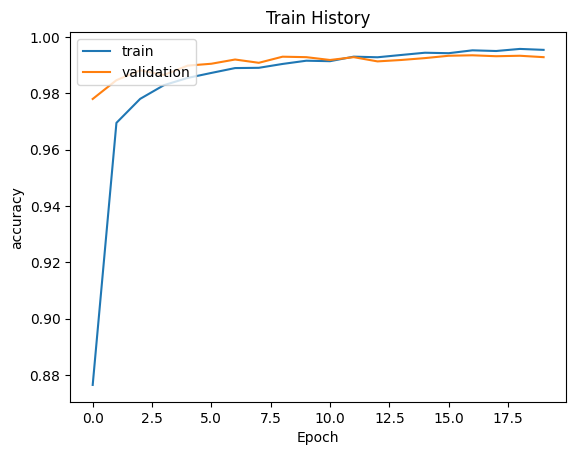

In [38]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

### evalution

In [39]:
scores = model.evaluate(x_test_nor, y_test_one)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 2s 4ms/step - loss: 0.0223 - accuracy: 0.9936

	[Info] Accuracy of testing data = 99.4%


### 預測結果

In [40]:
print("\t[Info] Making prediction of X_Test")
prediction = np.argmax(model.predict(x_test_nor), axis=-1)  # Making prediction and save result to prediction
print()
print("\t[Info] Show 10 prediction result (From 240):")
print("%s\n" % (prediction[240:250]))

	[Info] Making prediction of X_Test
313/313 [==============================] - 1s 3ms/step

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]



### 前十筆結果

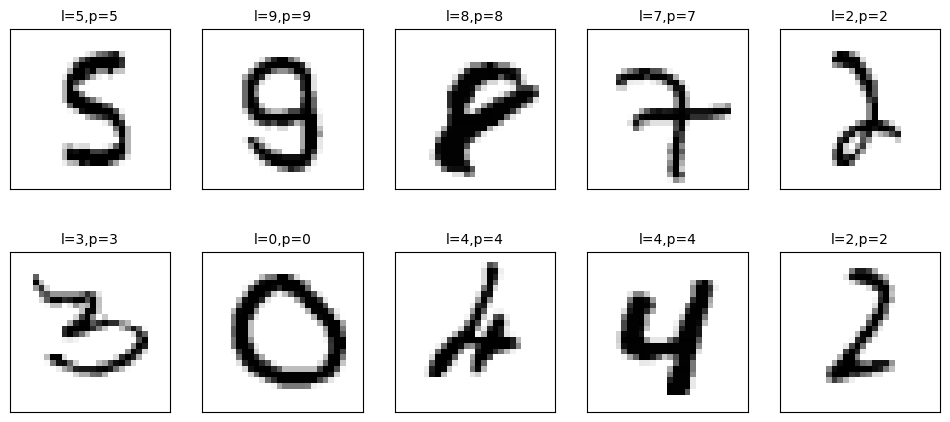

In [41]:
plot_images_labels_predict(x_test, y_test, prediction, idx=240)

## DNN

### 取得資料

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

### 資料預處理

In [43]:
# 對像素值進行標準化處理
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# 將目標變量進行One-Hot編碼
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 建構模型

In [44]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

### 訓練模型

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2778 - accuracy: 0.9194 - val_loss: 0.1372 - val_accuracy: 0.9612
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1147 - accuracy: 0.9655 - val_loss: 0.1090 - val_accuracy: 0.9668
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0786 - accuracy: 0.9763 - val_loss: 0.1061 - val_accuracy: 0.9692
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0585 - accuracy: 0.9819 - val_loss: 0.0974 - val_accuracy: 0.9712
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0454 - accuracy: 0.9850 - val_loss: 0.1114 - val_accuracy: 0.9702
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0358 - accuracy: 0.9879 - val_loss: 0.0997 - val_accuracy: 0.9734
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0310 - accuracy: 0.9899 - val_loss: 0.1025 - val_accuracy:

### Model accuracy

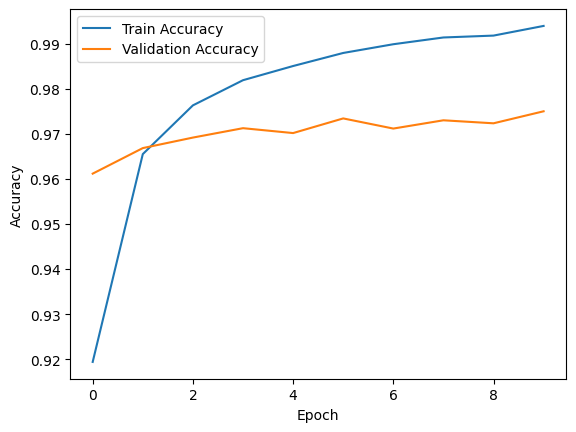

In [46]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 進行預測

In [47]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


In [48]:
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("預測準確率：", accuracy)

預測準確率： 0.978
